<a href="https://colab.research.google.com/github/prav87654/Classification-Cardiovascular-risk-prediction/blob/main/Classification_model_Praveen_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                              **CAPSTONE PROJECT 3**

#**Cardiovascular Risk Prediction (Classification model)**

###Heart disease refers to various types of conditions that can affect heart function. These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural defects that develop before birth.

###Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.
###The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [1]:
# Importing modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset

df=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [4]:
# Printing the first 5 rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Printing the last 5 rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Checking the shape of the dataset
df.shape

(3390, 17)

In [7]:
# Checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# Statistical Description of the Dataset
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [9]:
#value count of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [10]:
# Dropping the columns that are not required
heart_df=df.drop(columns=["id","education"],axis=1 )
heart_df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


#**Exploratory Data Analysis**

In [11]:
#Count of null values in each feature
heart_df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

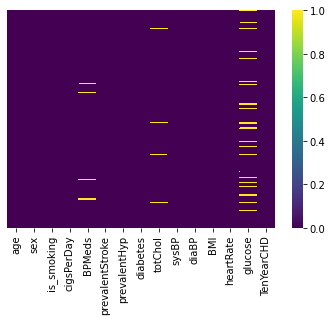

In [12]:
#Plotting heatmap to indicate the presence of null values
sns.heatmap(heart_df.isnull(), yticklabels=False, cmap="viridis")


In [13]:
#total percentage of missing data
missing_data = heart_df.isnull().sum()
total_percentage = (missing_data.sum()/heart_df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.48%


In [14]:
#Total number of null values in descending order
total =heart_df.isnull().sum().sort_values(ascending=False)
# percentage of missing data per category
percent_total = (heart_df.isnull().sum()/heart_df.isnull().count()).sort_values(ascending=False)*100
#Merging total and Percentage into a dataframe
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
#Displaying null values greater than 0
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


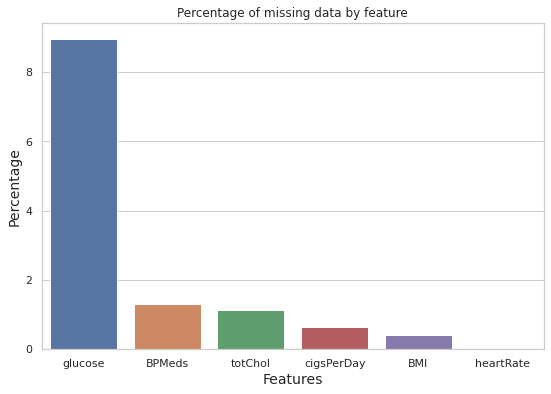

In [15]:
# Defining the size of the graph
plt.figure(figsize=(9,6))
#Defining the grid type
sns.set(style="whitegrid")
#plotting barplot for null value percentage
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
#Defining the title of the graph
plt.title('Percentage of missing data by feature')
#Defining the X-axis variable
plt.xlabel('Features', fontsize=14)
#Defining the Y-axis variable
plt.ylabel('Percentage', fontsize=14)
#Displaying the graph
plt.show()

At **9.15%**, the blood glucose entry has the highest percentage of missing data. The other features have very few missing entries.

Since the missing entries account for only **12%** of the total data we can drop these entries without losing alot of data.

In [16]:
# dropping missing entries
heart_df.dropna(axis=0, inplace=True)
#Defining the shape after dropping
heart_df.shape

(3004, 15)

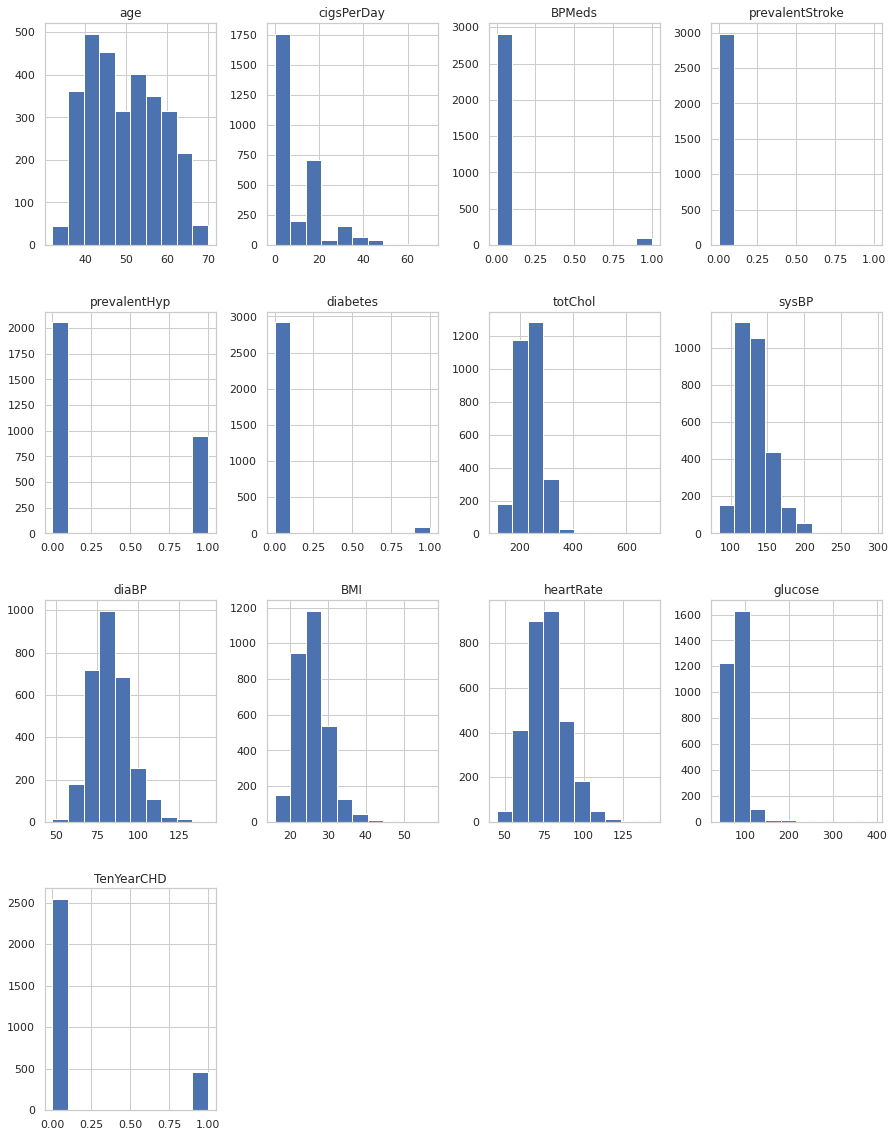

In [17]:
# Defining the size of the graph
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
#Plotting histogram for all features
heart_df.hist(ax = ax)
#Displaying the graph
plt.show()

###The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced

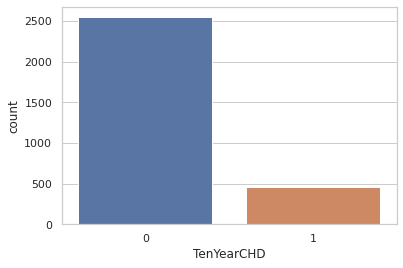

There are 2547 patients without heart disease and 457 patients with the disease


In [18]:
#Plotting countplot for the target feature
sns.countplot(x='TenYearCHD',data=heart_df)
#Displaying the graph
plt.show()
#Defining binary value to cases
cases =heart_df.TenYearCHD.value_counts()
#Printing the count of target values
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

###The ratio is 1:5.57 since the data is not properly balanced as the number of people without the disease significantly exceeds the number of people with the disease.

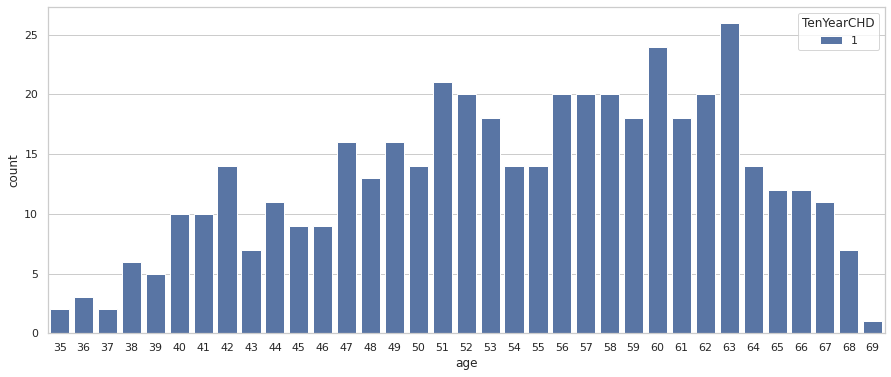

In [19]:
#Defining positive_cases to target value 1
positive_cases = heart_df[heart_df['TenYearCHD'] == 1]
#Defining the size of the graph
plt.figure(figsize=(15,6))
#Plotting the Countplot of positive_case to each age group
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD')
#Displaying the graph
plt.show()

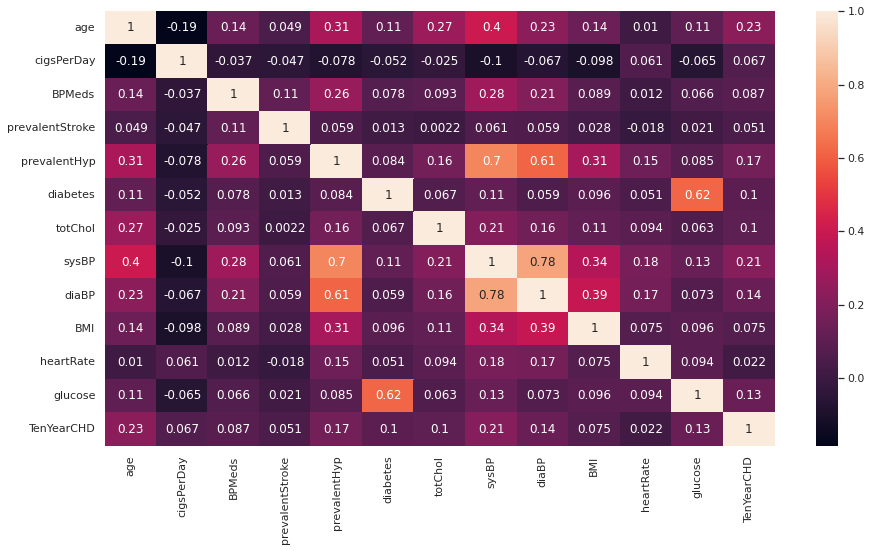

In [20]:
#Defining the size of the graph
plt.figure(figsize=(15,8))
#Implementing the dataset to the heatmap
sns.heatmap(heart_df.corr(), annot = True)
#Displaying the graph
plt.show()

###There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension and systolic blood pressure

In [21]:
#Replacing YES and NO values to 1 and 0 respectively
heart_df.is_smoking.replace(("YES","NO"),(1,0),inplace=True)
#Replacing M and F values to 1 and 0 repectively
heart_df.sex.replace (("M","F"),(1,0),inplace=True)
#Displaying the dataset after replacing
heart_df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [22]:
#Importing Add constant from statmodels.tools
from statsmodels.tools import add_constant as add_constant
#Adding constant to the dataset
heart_df_constant = add_constant(heart_df)
#Displaying the dataset with constant
heart_df_constant.head()

,const,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1.0,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,1.0,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,1.0,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,1.0,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,1.0,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [23]:
#Importing statmodels.api
import statsmodels.api as sm
#Importing scipy.stats
import scipy.stats as st

In [24]:
#Implementing chisquare test to the dataset
st.chisqprob = lambda chisq,heart_df: st.chi2.sf(chisq, heart_df)
cols = heart_df_constant.columns[:-1]
model = sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
#Fitting the model
result = model.fit()
#Displaaying the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.375297
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2989
Method:                           MLE   Df Model:                           14
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.1198
Time:                        13:51:01   Log-Likelihood:                -1127.4
converged:                       True   LL-Null:                       -1280.9
Covariance Type:            nonrobust   LLR p-value:                 4.200e-57
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7645      0.761    -11.522      0.000     -10.255      -7.274
age                 0.0648      0.007      8.861      0.000       0.050       0.079
sex                 0.5148      0.121      4.260      0.000       0.278       0.752
is_smoking          0.2154      0.172      1.252      0.211      -0.122       0.553
cigsPerDay          0.0184      0.007      2.702      0.007       0.005       0.032
BPMeds              0.1011      0.263      0.384      0.701      -0.414       0.616
prevalentStroke     0.9346      0.525      1.779      0.075      -0.095       1.964
prevalentHyp        0.1713      0.153      1.119      0.263      -0.129       0.471
diabetes           -0.0983      0.352     -0.279      0.780      -0.789       0.593
totChol             0.0031      0.001      2.627      0.009       0.001       0.005
sysBP               0.0166      0.004      3.975      0.000       0.008       0.025
diaBP              -0.0079      0.007     -1.139      0.255      -0.022       0.006
BMI                 0.0081      0.014      0.584      0.559      -0.019       0.035
heartRate          -0.0036      0.005     -0.786      0.432      -0.013       0.005
glucose             0.0094      0.003      3.749      0.000       0.004       0.014
===================================================================================
"""

In [25]:
#Creating a function for backward elimination
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

In [26]:
#Implenting Backward Elimination on the features
result = back_feature_elem(heart_df_constant, heart_df.TenYearCHD, cols)
#Displaying the summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2997
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.1167
Time:                        13:51:01   Log-Likelihood:                -1131.4
converged:                       True   LL-Null:                       -1280.9
Covariance Type:            nonrobust   LLR p-value:                 1.346e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2907      0.524    -17.735      0.000     -10.317      -8.264
age            0.0664      0.007      9.313      0.000       0.052       0.080
sex            0.5120      0.118      4.326      0.000       0.280       0.744
cigsPerDay     0.0237      0.005      5.119      0.000       0.015       0.033
totChol        0.0031      0.001      2.586      0.010       0.001       0.005
sysBP          0.0159      0.002      6.719      0.000       0.011       0.021
glucose        0.0090      0.002      4.828      0.000       0.005       0.013
==============================================================================
"""

In [27]:
#Importing SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [28]:
#Defining smote function
smote=SMOTE()

In [29]:
#Fitting smote function to the dataset
X_smote, y_smote =smote.fit_resample(heart_df.iloc[:,0:-1],heart_df["TenYearCHD"])

In [30]:
#Printing length of dataset
print(len(heart_df))
#Printing length of smote dataset
print(len(y_smote))

3004
5094


In [31]:
# value count of target smote feature
y_smote.value_counts()

0    2547
1    2547
Name: TenYearCHD, dtype: int64

In [32]:
#Concatenating X smote and y smote to a dataframe
new_heart_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
#Dropping Unnecessary features
new_heart_df=new_heart_df.drop(columns=["is_smoking","BPMeds","prevalentStroke","prevalentHyp","diabetes","diaBP","BMI","heartRate"],axis=1 )
#Displaying the processed dataset
new_heart_df

,age,sex,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,36,1,0.0,212.000000,168.000000,75.000000,0
1,46,0,10.0,250.000000,116.000000,94.000000,0
2,50,1,20.0,233.000000,158.000000,94.000000,1
3,64,0,30.0,241.000000,136.500000,77.000000,0
4,61,0,0.0,272.000000,182.000000,65.000000,1
...,...,...,...,...,...,...,...
5089,45,1,30.0,335.763311,126.371308,79.204139,1
5090,38,1,20.0,254.376666,132.186516,64.877272,1
5091,56,1,0.0,213.369262,140.446107,75.522953,1
5092,54,0,0.0,195.452736,146.419776,84.849088,1


In [33]:
#Defining x to independent features
x = new_heart_df.iloc[:,:-1]
#Defining y to the target feature
y = new_heart_df.iloc[:,-1]
#Importing test train split 
from sklearn.model_selection import train_test_split
#Defining training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=5)

In [34]:
#Displaying training and testing dataset shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4075, 6)
(1019, 6)
(4075,)
(1019,)


In [35]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
#Defining logistic regression
reg = LogisticRegression()
# Fitting the Training dataset into the model
reg.fit(x_train, y_train)
# Predicting using the Testing Features
y_pred =reg.predict(x_test)

In [36]:
#Importing GridSearchCV 
from sklearn.model_selection import GridSearchCV
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [37]:
#train the classifier
logistic_clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [38]:
#Getting the best parameters
logistic_clf.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [43]:
#make predictions
logistic_predict = logistic_clf.predict(x_test)

In [39]:
#Importing Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [44]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.93%


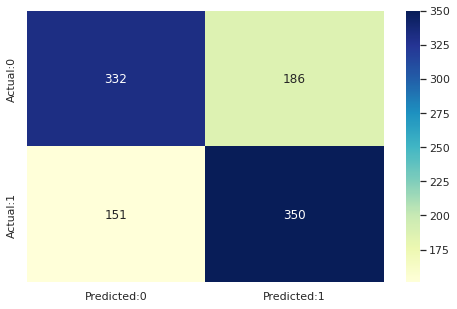

In [45]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [46]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       518
           1       0.65      0.70      0.68       501

    accuracy                           0.67      1019
   macro avg       0.67      0.67      0.67      1019
weighted avg       0.67      0.67      0.67      1019



In [47]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')


The f1 score for logistic regression is 67.5%


In [48]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

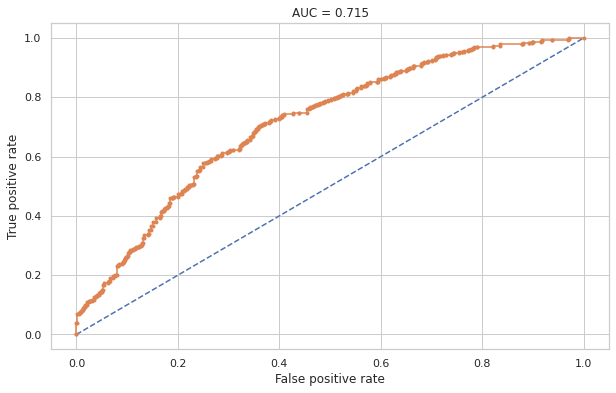

In [49]:
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [52]:
# train the model
knn_clf.fit(x_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 1}

In [53]:
# predictions
knn_predict = knn_clf.predict(x_test)

In [54]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 84.99%


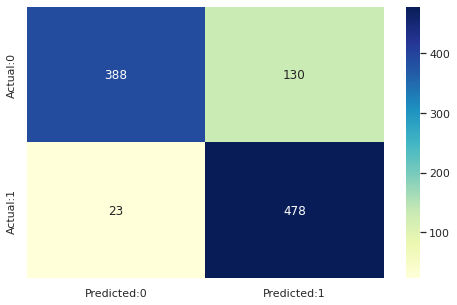

In [55]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")